## IMPORTS

In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [4]:
NOTAS = pd.read_csv('Expanded_data_with_more_features.csv')

In [5]:
NOTAS.drop ('Unnamed: 0', axis = 1, inplace = True)

In [6]:
len (NOTAS)

30641

In [7]:
NOTAS.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [8]:
NOTAS.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [9]:
NOTAS.head ()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [10]:
NOTAS.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [11]:
NOTAS.describe ()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [46]:
NOTAS['MathScore'].describe 

<bound method NDFrame.describe of 0        71
1        69
2        87
3        45
4        76
         ..
30636    59
30637    58
30638    61
30639    82
30640    64
Name: MathScore, Length: 30641, dtype: int64>

In [47]:
NOTAS['MathScore'].value_counts()

MathScore
64    890
67    814
71    797
70    787
63    762
     ... 
12      2
14      2
0       1
8       1
7       1
Name: count, Length: 95, dtype: int64

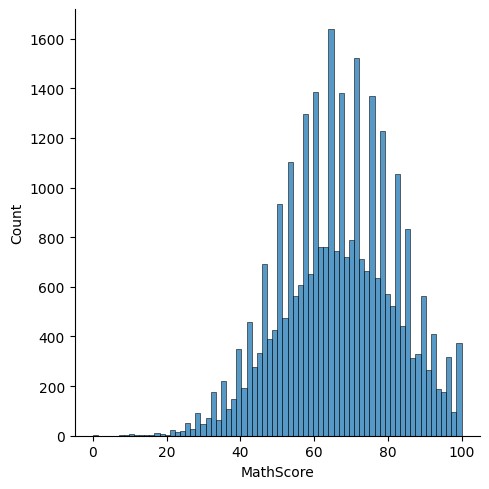

In [48]:
sns.displot(NOTAS['MathScore'])

<Axes: >

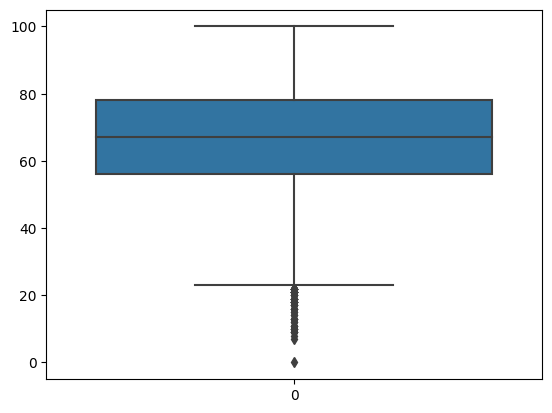

In [49]:
sns.boxplot(NOTAS['MathScore'])

<Axes: >

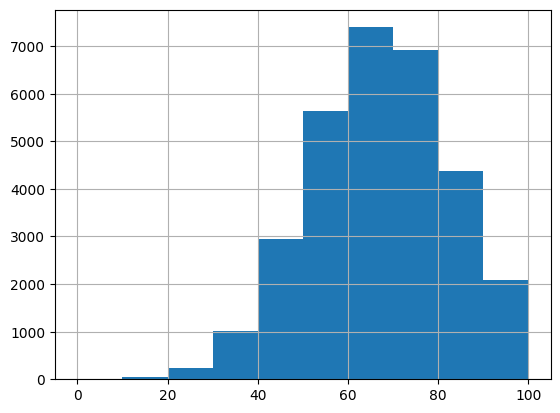

In [54]:
NOTAS['MathScore'].hist ()

In [56]:
CUENTADEPORTE = NOTAS['PracticeSport'].value_counts ()

In [58]:
CUENTADEPORTE.head ()

PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64

<Axes: >

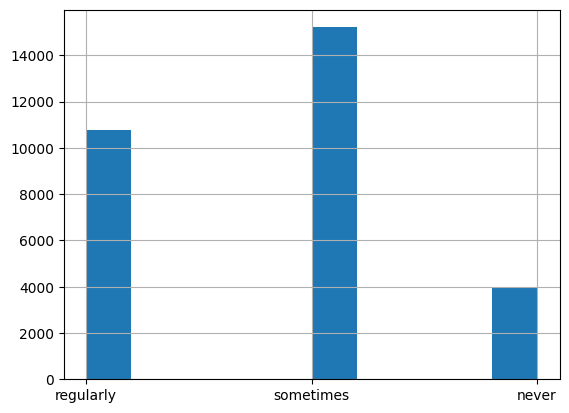

In [59]:
NOTAS['PracticeSport'].hist ()

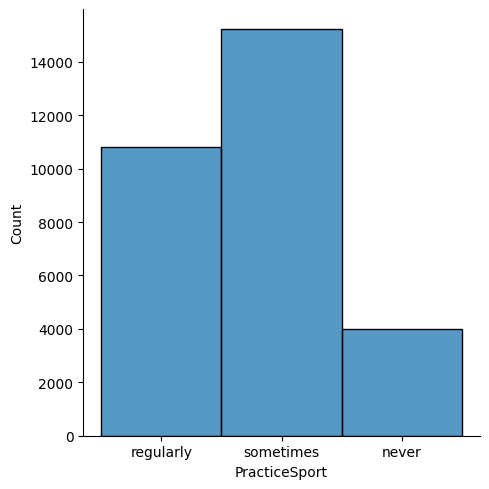

In [60]:
sns.displot(NOTAS['PracticeSport'])

In [62]:
NOTAS.groupby('MathScore').agg({'ReadingScore' : 'mean'})

,ReadingScore
MathScore,
0,17.000000
7,11.000000
8,24.000000
9,28.000000
10,24.750000
...,...
96,91.101911
97,91.300000
98,91.694737


In [13]:
tabla_cont = NOTAS.groupby('MathScore').agg({'WritingScore': 'value_counts'}).unstack().fillna(0)
tabla_cont

tabla_cont.apply(lambda x: 100*x/x.sum(), axis=1)

WritingScore                                                     
WritingScore          4    6     9      10     12   13   14   15   16   17    
MathScore                                                                     
0                     0.0  0.0   0.0  100.0    0.0  0.0  0.0  0.0  0.0  0.0  \
7                     0.0  0.0   0.0    0.0  100.0  0.0  0.0  0.0  0.0  0.0   
8                     0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
9                     0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
10                    0.0  0.0  25.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
...                   ...  ...   ...    ...    ...  ...  ...  ...  ...  ...   
96                    0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
97                    0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
98                    0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
99                    0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
100                   0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   

              ...                                                               
WritingScore  ...       91        92        93        94        95        96    
MathScore     ...                                                               
0             ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  \
7             ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8             ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9             ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10            ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
96            ...  3.821656  3.184713  3.821656  3.821656  5.095541  4.458599   
97            ...  7.500000  4.375000  3.125000  1.250000  6.875000  3.125000   
98            ...  3.157895  3.157895  7.368421  4.210526  4.210526  1.052632   
99            ...  3.092784  4.123711  3.092784  5.154639  4.123711  6.185567   
100           ...  3.636364  3.636364  5.090909  6.545455  6.545455  3.272727   

                                                       
WritingScore       97        98        99         100  
MathScore                                              
0             0.000000  0.000000  0.000000   0.000000  
7             0.000000  0.000000  0.000000   0.000000  
8             0.000000  0.000000  0.000000   0.000000  
9             0.000000  0.000000  0.000000   0.000000  
10            0.000000  0.000000  0.000000   0.000000  
...                ...       ...       ...        ...  
96            1.910828  6.369427  6.369427  14.012739  
97            5.625000  8.125000  1.875000  10.625000  
98            4.210526  3.157895  5.263158  23.157895  
99            9.278351  6.185567  8.247423  18.556701  
100           7.636364  3.272727  4.000000  29.454545  

[95 rows x 93 columns]

### IMPORT 2

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, data)

In [18]:
est = smf.ols(formula='WritingScore ~ TestPrep', data=NOTAS).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WritingScore   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2763.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:51:47   Log-Likelihood:            -1.1843e+05
No. Observations:               28811   AIC:                         2.369e+05
Df Residuals:                   28809   BIC:                         2.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           74.7033      0.148    505.038      0.000      74.413      74.993
TestPrep[T.none]    -9.6105      0.183    -52.563      0.000      -9.969      -9.252
==============================================================================
Omnibus:                      259.198   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.356
Skew:                          -0.172   Prob(JB):                     9.52e-51
Kurtosis:                       2.728   Cond. No.                         3.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
formula_reg_log = "IsFirstChild ~ WritingScore + C(TestPrep)"

modelo_log = smf.logit(formula_reg_log, NOTAS).fit()
modelo_log.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (27978, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).